In [1]:
from langgraph.graph import StateGraph,START,END,add_messages
from typing import TypedDict,Annotated,List
import langchain

In [2]:
class AgentState(TypedDict):
    messages:Annotated[List,add_messages]
    

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os
load_dotenv()
llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash',api_key=os.getenv('GOOGLE_API_KEY'))

c:\Users\mawiy\OneDrive\Desktop\Legal-Agent\myLegal\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [4]:
def chatbot(state:AgentState)-> AgentState:
    # print(llm.invoke("hii"))
    return {
'messages': llm.invoke(state['messages'])}

In [5]:
graph = StateGraph(AgentState)
graph.add_node('response',chatbot)
graph.add_edge(START,'response')
graph.add_edge('response',END)


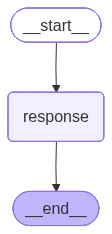

In [6]:
app= graph.compile()
app

In [7]:
from langchain_core.messages import HumanMessage

In [8]:
while True:
    userinput=input('user: ')
    if userinput=='exit':
        break
    else:
        res=app.invoke({'messages':[HumanMessage(content=userinput)]})
        print(res['messages'][1].content)

Hello! How can I help you today?
I'm sorry, but I don't know your name. As an AI, I don't have access to personal information about you.

If you'd like to tell me your name, I can use it during our conversation!
It sounds like Arsh is a very special and beloved member of your family! "A beautiful boy with four legs" immediately paints a picture of a wonderful pet.

Since I don't know Arsh myself, I can't tell you about him, but I'd absolutely love to *hear* about him! To help me understand what makes him so beautiful and unique, tell me:

*   **What kind of four-legged boy is Arsh?** (e.g., a dog, a cat, etc.)
*   **What makes him so beautiful in your eyes?** Is it his fur color, his eyes, his gentle demeanor, his playful energy?
*   **What's his personality like?** Is he cuddly, mischievous, energetic, calm, super smart, or a total goofball?
*   **What are some of his favorite things to do?** Does he love to play fetch, chase toys, nap in sunbeams, go for walks, or get belly rubs?
*  